In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , GridSearchCV  , KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
x = df.drop("Outcome" , axis=1)
y = df["Outcome"]


In [5]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=2 , shuffle=True)


<AxesSubplot:>

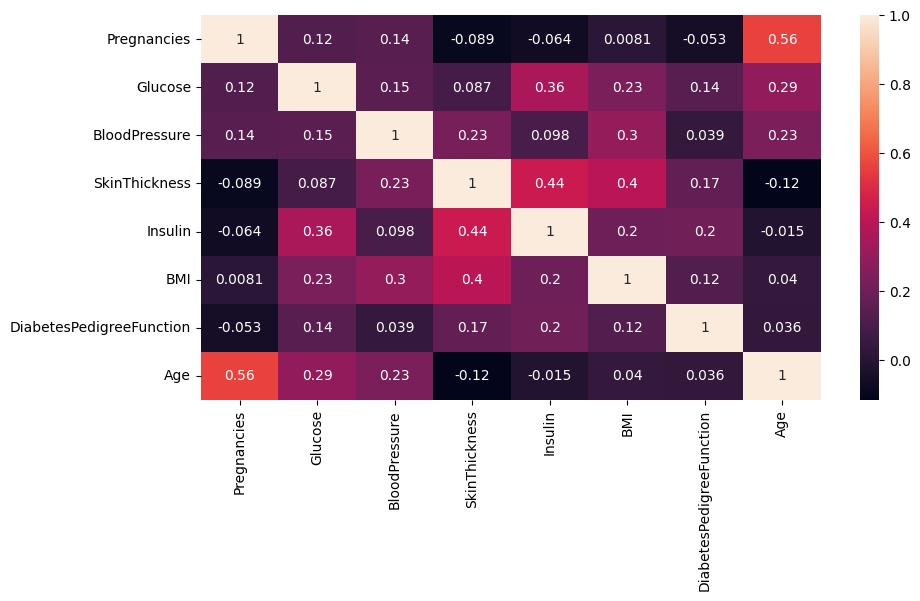

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(x_train.corr() , annot=True)

<AxesSubplot:>

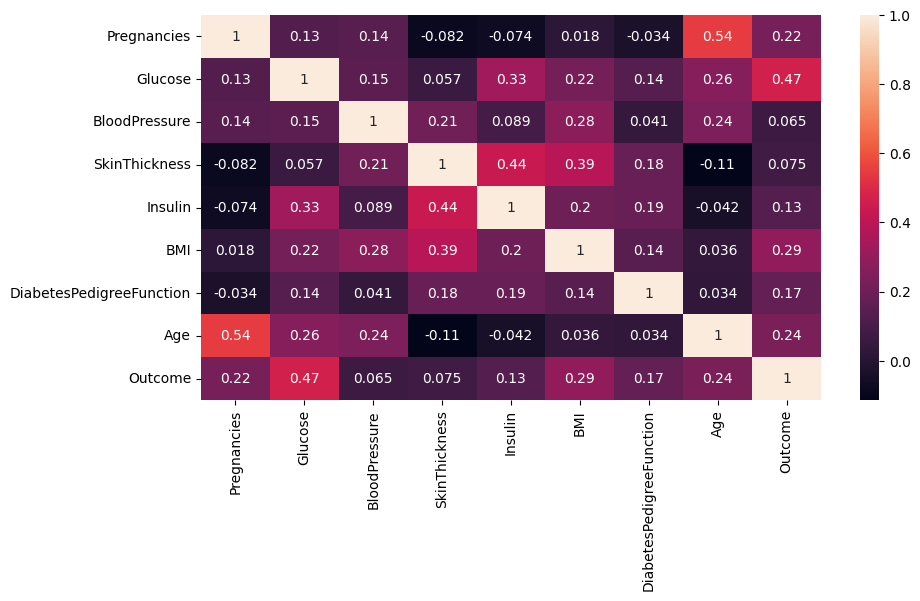

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot=True)

In [8]:
kf = KFold(n_splits=5)
pipe = Pipeline([
    ("scaler" , StandardScaler()),
    ("classifier", KNeighborsClassifier())
])
grid_params = {
    
   'classifier__n_neighbors' : [3,5,7],
   'classifier__weights' : ['uniform', 'distance'],
   'classifier__algorithm' : ['ball_tree','kd_tree', 'brute'],
   'classifier__p' : [1,2,3,4,5]
}

In [9]:
grid_search = GridSearchCV(pipe , grid_params , cv=kf)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                   'brute'],
                         'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2, 3, 4, 5],
                         'classifier__weights': ['uniform', 'distance']})

In [10]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7378515260562442
{'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 7, 'classifier__p': 2, 'classifier__weights': 'uniform'}


In [11]:
print(grid_search.score(x_test,y_test))

0.7467532467532467


In [12]:
pipe2 = Pipeline([
    ("scaler" , StandardScaler()),
    ("class" , LogisticRegression()),

])

grid_params2 = {
   'class__penalty' : ['l1','l2'],
    'class__C' : [0.1,0.2,0.3, 0.01],
    'class__fit_intercept' : [True, False]


}
grid_search2= GridSearchCV(pipe2 , grid_params2, cv=kf)
grid_search2.fit(x_train,y_train)
print(grid_search2.best_estimator_)
print(grid_search2.best_params_)
print(grid_search2.best_score_)
print(grid_search2.score(x_test,y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('class', LogisticRegression(C=0.1))])
{'class__C': 0.1, 'class__fit_intercept': True, 'class__penalty': 'l2'}
0.7638944422231108
0.7727272727272727


c:\Users\21626\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\21626\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\21626\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\21626\AppData\Local\Programs\Python\Python310\lib\si

In [13]:
#stacking

estimators = [
    ('svc' ,SVC(random_state=42 )),
    ('knn', KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors =  7, p = 2, weights = 'uniform')),
    ('dct',DecisionTreeClassifier(random_state=42)),
]

In [14]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(C =  0.1, fit_intercept =  True, penalty ='l2'),
    )

In [15]:
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)
print(stacking_model.score(x_test,y_test))


0.7857142857142857


In [40]:
#boosting using adaboost
dt = DecisionTreeClassifier(max_depth=1)

max = 0
for i in range (10):
    ada = AdaBoostClassifier(base_estimator=dt , n_estimators=i+1)
    ada.fit(x_train,y_train)
    k = ada.score(x_test,y_test)
    if k > max:
        max =k

print(max)


0.7727272727272727
